In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
data = {
  "turn": 14,
  "board": {
    "height": 11,
    "width": 11,
    "food": [
      #{"x": 5, "y": 5}, 
      {"x": 9, "y": 0}, 
      {"x": 2, "y": 6}
    ],
    "hazards": [
      {"x": 3, "y": 2}
    ],
    "snakes": [
      {
        "id": "snake-508e96ac-94ad-11ea-bb37",
        "name": "My Snake",
        "health": 54,
        "body": [
          {"x": 0, "y": 0}, 
          {"x": 1, "y": 0}, 
          {"x": 2, "y": 0}
        ],
        "latency": "111",
        "head": {"x": 0, "y": 0},
        "length": 3,
        "shout": "why are we shouting??",
        "squad": "",
        "customizations":{
          "color":"#FF0000",
          "head":"pixel",
          "tail":"pixel"
        }
      }, 
      {
        "id": "snake-b67f4906-94ae-11ea-bb37",
        "name": "Another Snake",
        "health": 16,
        "body": [
          {"x": 5, "y": 4}, 
          {"x": 5, "y": 3}, 
          {"x": 6, "y": 3},
          {"x": 6, "y": 2}
        ],
        "latency": "222",
        "head": {"x": 5, "y": 4},
        "length": 4,
        "shout": "I'm not really sure...",
        "squad": "",
        "customizations":{
          "color":"#26CF04",
          "head":"silly",
          "tail":"curled"
        }
      }
    ]
  },
      "you": {
      "id": "snake-508e96ac-94ad-11ea-bb37",
        "name": "My Snake",
        "health": 54,
        "body": [
        {"x": 0, "y": 0}, 
        {"x": 1, "y": 0}, 
        {"x": 2, "y": 0}
        ],
        "latency": "111",
        "head": {"x": 0, "y": 0},
        "length": 3,
        "shout": "why are we shouting??",
        "squad": "",
        "customizations":{
        "color":"#FF0000",
        "head":"pixel",
        "tail":"pixel"
        }
    }
}

In [2]:
food_weight = 5
snake_weight = -9
snake_head_weight = -2
wall_weight = -9

In [3]:
def gkern(l=10, scale=10):
    """\
    creates gaussian kernel with side length `l` and a sigma of `sig`
    """
    sig = (l-1)/3
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sig))
    kernel = np.outer(gauss, gauss)
    return scale * kernel / np.max(kernel)

In [4]:
def centre_grad(data: dict) -> np.array:
  board_w = data["board"]["width"]
  board_h = data["board"]["height"]
  gradient_board = gkern(max(board_w, board_h))

  return gradient_board

x_min:3, x_max:14
y_min:12, y_max:23
food_x: 9, food_y: 0
kernel_size: 11
mid: 12


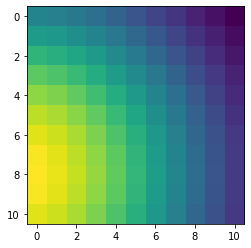

In [18]:
board = centre_grad(data)
food = {"x": 9, "y": 0}
food_x, food_y = food['x'], food['y']
kern_size = max(board.shape[0], board.shape[1])
kernel = gkern(kern_size*2 + 1, food_weight)
mid = kern_size + 1
x_min = mid - food_x
x_max = mid + board.shape[0] - food_x
y_min = mid - food_y
y_max = mid + board.shape[0] - food_y
print(f"x_min:{x_min}, x_max:{x_max}")
print(f"y_min:{y_min}, y_max:{y_max}")
new = kernel[x_min:x_max, y_min:y_max]
print(f"food_x: {food_x}, food_y: {food_y}")
print(f"kernel_size: {kern_size}")
print(f"mid: {mid}")
plt.imshow(kernel)
ax = plt.gca()
rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max-y_min, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.imshow(new)
plt.show()

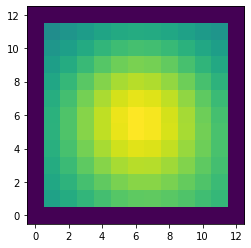

In [17]:
board = centre_grad(data)
board_x, board_y = 11, 11
board += new*10
board = np.pad(board, 1, 'constant', constant_values=snake_weight)

plt.imshow(np.rot90(np.fliplr(board)), interpolation='none', origin="lower")
plt.show()
